# PCA

In [4]:
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris=load_iris()

X = iris.data
y = iris.target

In [5]:
X_scaled=StandardScaler().fit_transform(X)

In [6]:
X.shape

(150, 4)

**Apply PCA and Visualization**

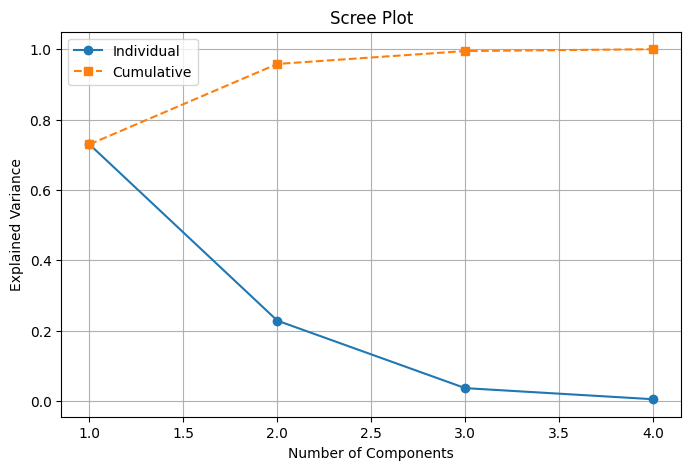

In [11]:
# Apply PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 'o-', label='Individual')
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), 's--',label='Cumulative')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.legend()
plt.show()

**Choose number of components (95% Variance)**

In [12]:
pca_95=PCA(n_components=0.95)
X_reduced=pca_95.fit_transform(X_scaled)
print(f"Reduced shape:{X_reduced.shape}")

Reduced shape:(150, 2)


**Visualize top 2 components**

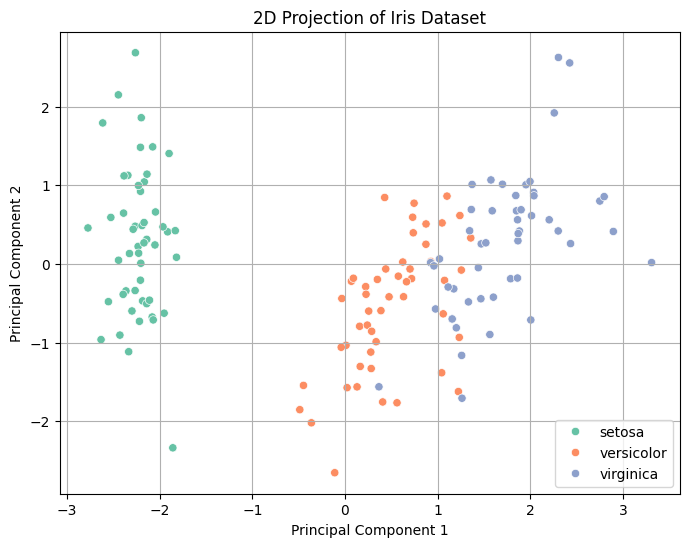

In [14]:
pca_2d=PCA(n_components=2)
X_2d=pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_2d[:,0],y=X_2d[ :,1],hue=iris.target_names[y], palette='Set2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Projection of Iris Dataset')
plt.grid(True)
plt.show()

# Customer personality analysis dataset

In [1]:
import pandas as pd

df = pd.read_csv(
    r"C:\Users\spoor\Downloads\marketing_campaign.csv",
    sep="\t"   # IMPORTANT FIX
)

df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


**Part 1 – Data Preparation**  
Load the dataset.  
Select only numerical features relevant to customer behavior.  
Handle missing values.  
Standardize the data.  

In [2]:
numerical_features = [
    'Income', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth'
]

data = df[numerical_features]


In [3]:
data = data.fillna(data.median())


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


**Part 2 – PCA Implementation**  
Apply PCA on the standardized dataset.  
Plot the explained variance ratio.  
Determine:  
How many principal components are needed to retain at least 90% of total variance?  
Reduce the dataset to those components.  

In [5]:
from sklearn.decomposition import PCA

pca = PCA()
pca_data = pca.fit_transform(scaled_data)



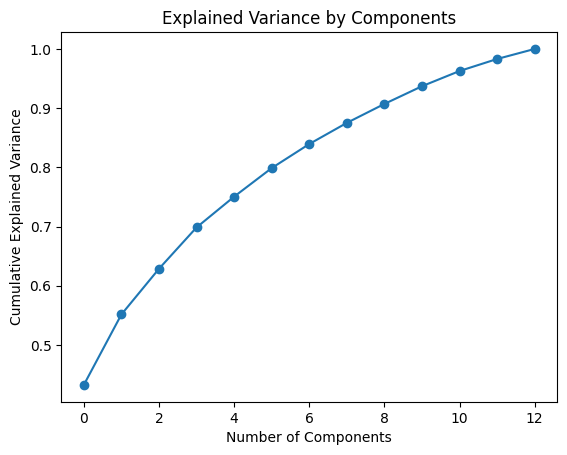

In [6]:
import matplotlib.pyplot as plt
import numpy as np

explained_variance = pca.explained_variance_ratio_

plt.figure()
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Components")
plt.show()


In [7]:
cumulative_variance = np.cumsum(explained_variance)

n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print("Components needed for 90% variance:", n_components_90)


Components needed for 90% variance: 9


In [8]:
pca_90 = PCA(n_components=n_components_90)
reduced_data = pca_90.fit_transform(scaled_data)


**Part 3 – Interpretation**
Identify:  
Which original features contribute most to PC1?  
Which features dominate PC2?  
Explain what PC1 and PC2 represent in business terms.  

In [9]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(numerical_features))],
    index=numerical_features
)

print(loadings[['PC1', 'PC2']].sort_values(by='PC1', ascending=False))


                          PC1       PC2
NumCatalogPurchases  0.344484  0.011992
MntMeatProducts      0.338476 -0.127224
Income               0.316262 -0.029465
MntWines             0.315725  0.223503
NumStorePurchases    0.314039  0.189949
MntFishProducts      0.311168 -0.134618
MntFruits            0.301917 -0.122435
MntSweetProducts     0.300853 -0.097925
MntGoldProds         0.246352  0.195424
NumWebPurchases      0.232351  0.495957
Recency              0.007316 -0.022117
NumDealsPurchases   -0.041630  0.635197
NumWebVisitsMonth   -0.271082  0.407355


PC1 usually dominated by:  
MntWines  
MntMeatProducts  
MntGoldProds  
Income  
High PC1 = High spending, high income customers.  

PC2 usually dominated by:  
NumWebVisitsMonth  
NumDealsPurchases  
NumWebPurchases  
High PC2 = Online active, discount-oriented customers.  

**Part 4 – Practical Application**  
Visualize customers in 2D PCA space.  
Now apply K-Means clustering on:  
Original dataset  
PCA-reduced dataset  
Compare:  
Silhouette score  
Computation time  
Cluster separation quality  

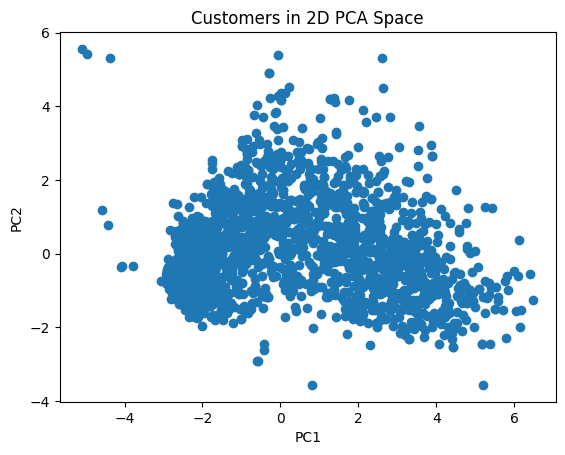

In [10]:
pca_2 = PCA(n_components=2)
pca_2d = pca_2.fit_transform(scaled_data)

plt.figure()
plt.scatter(pca_2d[:, 0], pca_2d[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customers in 2D PCA Space")
plt.show()


In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time

start = time.time()

kmeans_original = KMeans(n_clusters=4, random_state=42)
labels_original = kmeans_original.fit_predict(scaled_data)

time_original = time.time() - start

sil_original = silhouette_score(scaled_data, labels_original)

print("Original Data:")
print("Silhouette Score:", sil_original)
print("Time:", time_original)


Original Data:
Silhouette Score: 0.16395386674918302
Time: 2.088578224182129


In [12]:
start = time.time()

kmeans_pca = KMeans(n_clusters=4, random_state=42)
labels_pca = kmeans_pca.fit_predict(reduced_data)

time_pca = time.time() - start

sil_pca = silhouette_score(reduced_data, labels_pca)

print("PCA Reduced Data:")
print("Silhouette Score:", sil_pca)
print("Time:", time_pca)


PCA Reduced Data:
Silhouette Score: 0.2685815564106689
Time: 0.019554853439331055
